In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

advertising = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)

advertising

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


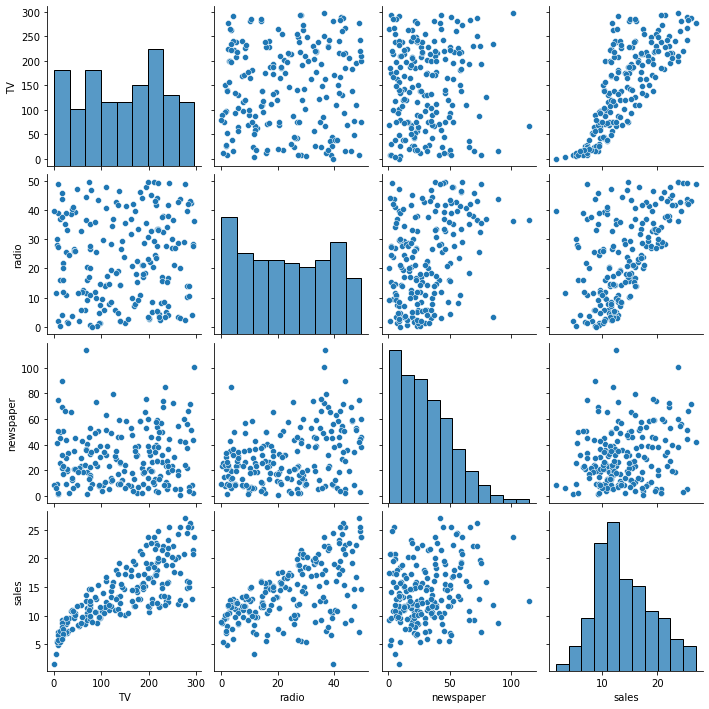

In [54]:
sns.pairplot(data=advertising)

In [47]:
def ols(reg="sales ~ TV + radio + newspaper"):
    fit2 = smf.ols(reg, data=advertising).fit()
    print(fit2.summary())

    fig, axs = plt.subplots(1,2, figsize=[15,6])
    axs[0].plot(fit2.fittedvalues, fit2.resid, 'o')
    axs[0].axhline(y=fit2.resid.mean(), color='r', linestyle='-')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    sns.histplot(data=fit2.resid, ax=axs[1])
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        19:42:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

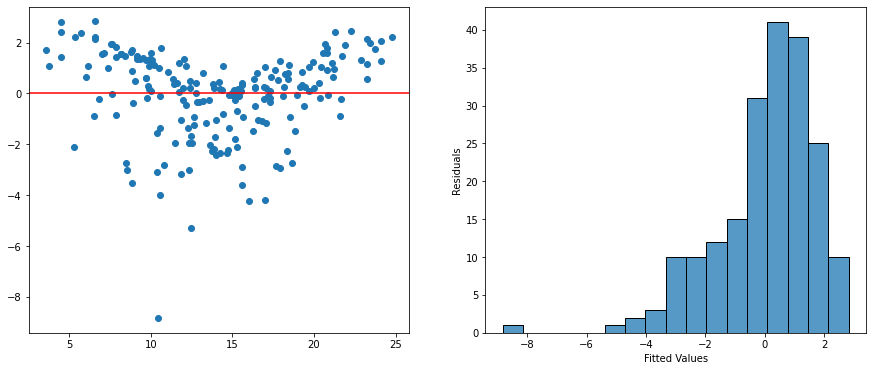

In [48]:
ols("sales ~ TV + radio + newspaper")

In [13]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        19:31:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.53e-96
Time:                        19:44:08   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8160      0.45

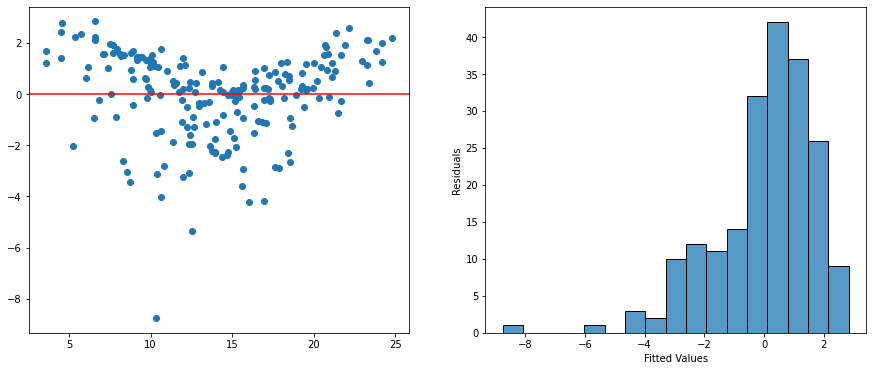

In [55]:
ols("sales ~ TV + radio + np.log(newspaper)")

                            OLS Regression Results                            
Dep. Variable:          np.log(sales)   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     260.9
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           3.57e-68
Time:                        19:44:18   Log-Likelihood:                 53.748
No. Observations:                 200   AIC:                            -99.50
Df Residuals:                     196   BIC:                            -86.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7390      0.035     50.300      0.0

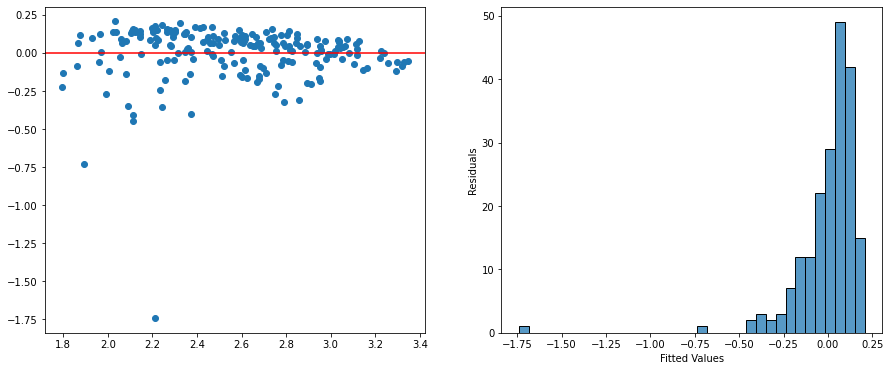

In [56]:
ols("np.log(sales) ~ TV + radio + newspaper")

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          6.68e-146
Time:                        19:58:11   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

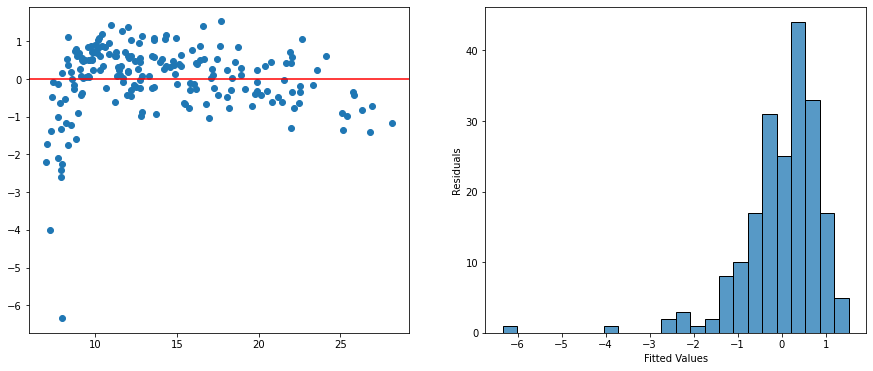

In [61]:
ols("sales ~ TV + radio + (TV * radio)")